<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [1]:
!pip install osmnx geopy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 1.6 MB/s eta 0:00:00


In [2]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

### 🕸 Street network

In [9]:
PLACE_NAME = "CBD, Melbourne, Australia"
graph = osmnx.graph_from_place(PLACE_NAME)

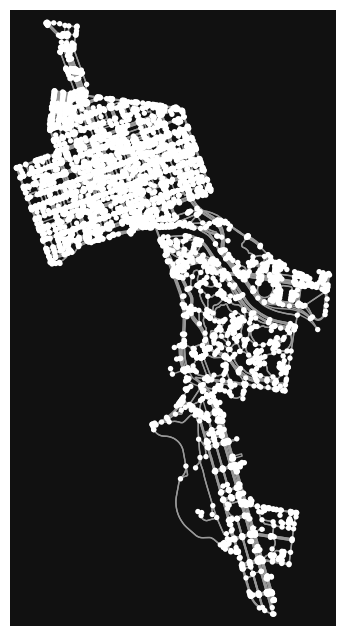

In [13]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [14]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

<ipython-input-14-25295188f309>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(


amenity                     geometry  \
element_type osmid                                              
node         114574448       NaN  POINT (144.96536 -37.81773)   
             174844923       NaN  POINT (144.96493 -37.81569)   
             242543678  post_box  POINT (144.96682 -37.81326)   
             594172523      bank  POINT (144.96446 -37.81637)   
             594172535      bank  POINT (144.96463 -37.81623)   

                       addr:housenumber      addr:street       brand  \
element_type osmid                                                     
node         114574448              270  Flinders Street  DoubleTree   
             174844923              270   Collins Street     Novotel   
             242543678              NaN              NaN         NaN   
             594172523              NaN              NaN         ANZ   
             594172535              271    Collns Street        HSBC   

                       brand:wikidata  \
element_type osmid                      
node         114574448       Q2504643   
             174844923        Q420545   
             242543678            NaN   
             594172523        Q714641   
             594172535        Q190464   

                                                   brand:wikipedia building  \
element_type osmid                                                            
node         114574448                               en:DoubleTree      yes   
             174844923                                  en:Novotel   retail   
             242543678                                         NaN   retail   
             594172523  en:Australia and New Zealand Banking Group   retail   
             594172535                                     en:HSBC   retail   

                                                         contact:facebook  \
element_type osmid                                                          
node         114574448  https://www.facebook.com/DoubleTreeHiltonFlind...   
             174844923                                                NaN   
             242543678                                                NaN   
             594172523                                                NaN   
             594172535                                                NaN   

                                                    contact:instagram  ...  \
element_type osmid                                                     ...   
node         114574448  https://www.instagram.com/doubletreemelbourne  ...   
             174844923                                            NaN  ...   
             242543678                                            NaN  ...   
             594172523                                            NaN  ...   
             594172535                                            NaN  ...   

                       hot_water toilets:hands_drying toilets:handwashing  \
element_type osmid                                                          
node         114574448       NaN                  NaN                 NaN   
             174844923       NaN                  NaN                 NaN   
             242543678       NaN                  NaN                 NaN   
             594172523       NaN                  NaN                 NaN   
             594172535       NaN                  NaN                 NaN   

                       toilets:paper_supplied old_name:2 old_name:3  \
element_type osmid                                                    
node         114574448                    NaN        NaN        NaN   
             174844923                    NaN        NaN        NaN   
             242543678                    NaN        NaN        NaN   
             594172523                    NaN        NaN        NaN   
             594172535                    NaN        NaN        NaN   

                       old_name:4 old_name:5 ways type  
element_type osmid                      

<Axes: >

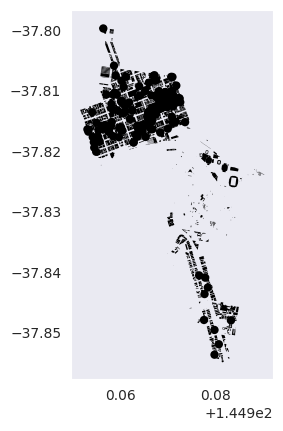

In [15]:
buildings.plot(color="black", edgecolor="none")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [54]:
from osmnx._errors import InsufficientResponseError

In [62]:
# amn = ["restaurant","pub", "atm", "stripclub", "bar", "hospital", "police"]
# for i in amn:
#   try:
#     amenity = osmnx.geometries_from_place(
#         PLACE_NAME,
#         {
#             "amenity": str(i)
#         }
#     )
#   except FileNotFoundError:
#         print(f"File {i} not found. Skipping.")
# amenity.head()

amn = ["bar", "atm", "stripclub", "hospital"]
am_df = []
for i in amn:
  try:
    amenity = osmnx.geometries_from_place(
        PLACE_NAME,
        {
            "amenity": str(i)
        }
    )
    am_df.append(amenity)
  except InsufficientResponseError:
        print(f"Aminity {i} not found. Skipping.")
print(am_df)

<ipython-input-62-a0a5831435c5>:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  amenity = osmnx.geometries_from_place(
<ipython-input-62-a0a5831435c5>:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  amenity = osmnx.geometries_from_place(
<ipython-input-62-a0a5831435c5>:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `fe

[                          addr:city addr:housenumber addr:postcode  \
element_type osmid                                                   
node         580269524    Melbourne              379          3004   
             592841898          NaN              NaN           NaN   
             593990782    Melbourne              150          3000   
             598049995          NaN              162          3000   
             600744881          NaN            27-29          3000   
...                             ...              ...           ...   
             11639098435        NaN              NaN           NaN   
             11721812459        NaN          139-141          3000   
             11763221128        NaN              NaN           NaN   
way          264856044    Melbourne              332          3000   
             1122855620   Melbourne               17          3000   

                                     addr:street amenity food  \
element_type osmid     

<ipython-input-62-a0a5831435c5>:18: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  amenity = osmnx.geometries_from_place(


### 🎢 Putting it all together in one map

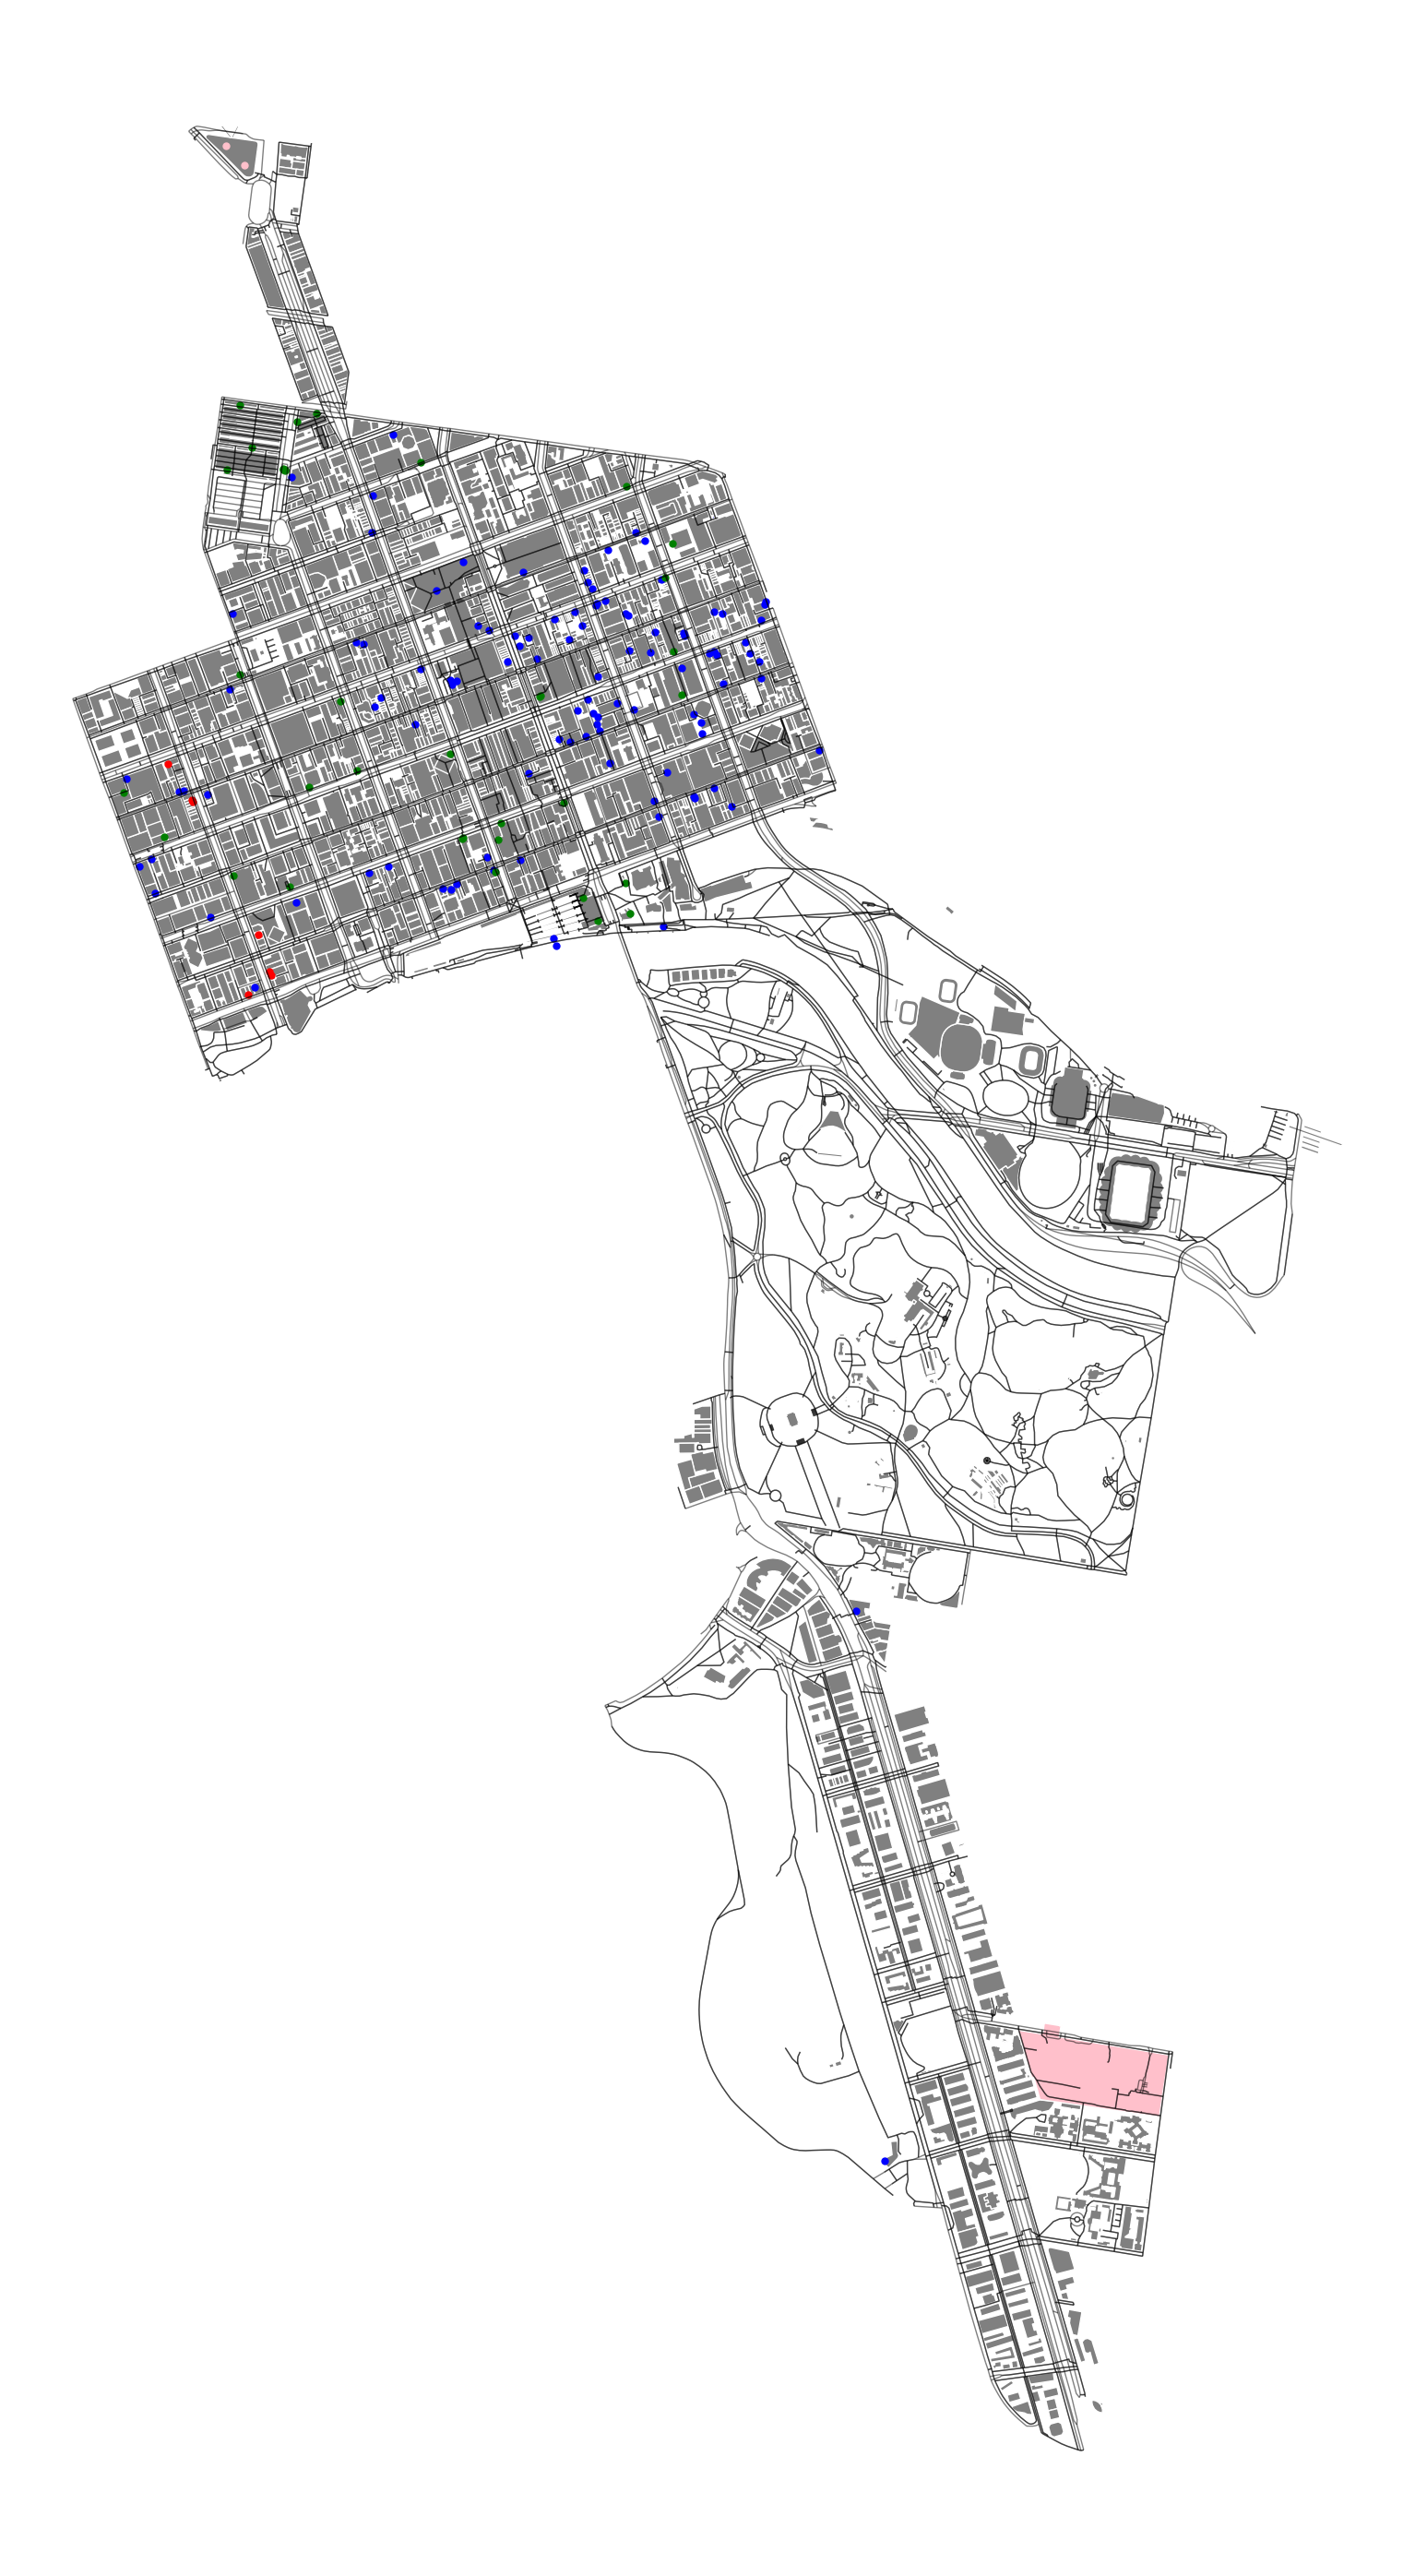

In [82]:
figure, ax = plt.subplots(figsize=(24,36))
buildings_polygons = buildings[buildings.geometry.type == 'Polygon']

# Plot the footprint
buildings_polygons.plot(ax=ax, facecolor="grey")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.5)

# Plot restaurants
col = ['blue', 'green', 'red', 'pink']
# amenity.plot(ax=ax, color="pink", markersize=2)
for i in range(len(am_df)):
  amenity = am_df[i]
  amenity.plot(figsize=(10,6), ax=ax, color=col[i], markersize=25)

plt.axis('off')
plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

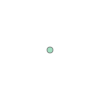

In [90]:
coords = (144.97973, -37.84527)
p = Point(coords)
p

In [91]:
print(p.x, p.y)

144.97973 -37.84527


In [92]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)
print(geom)

                      geometry
0  POINT (144.97973 -37.84527)


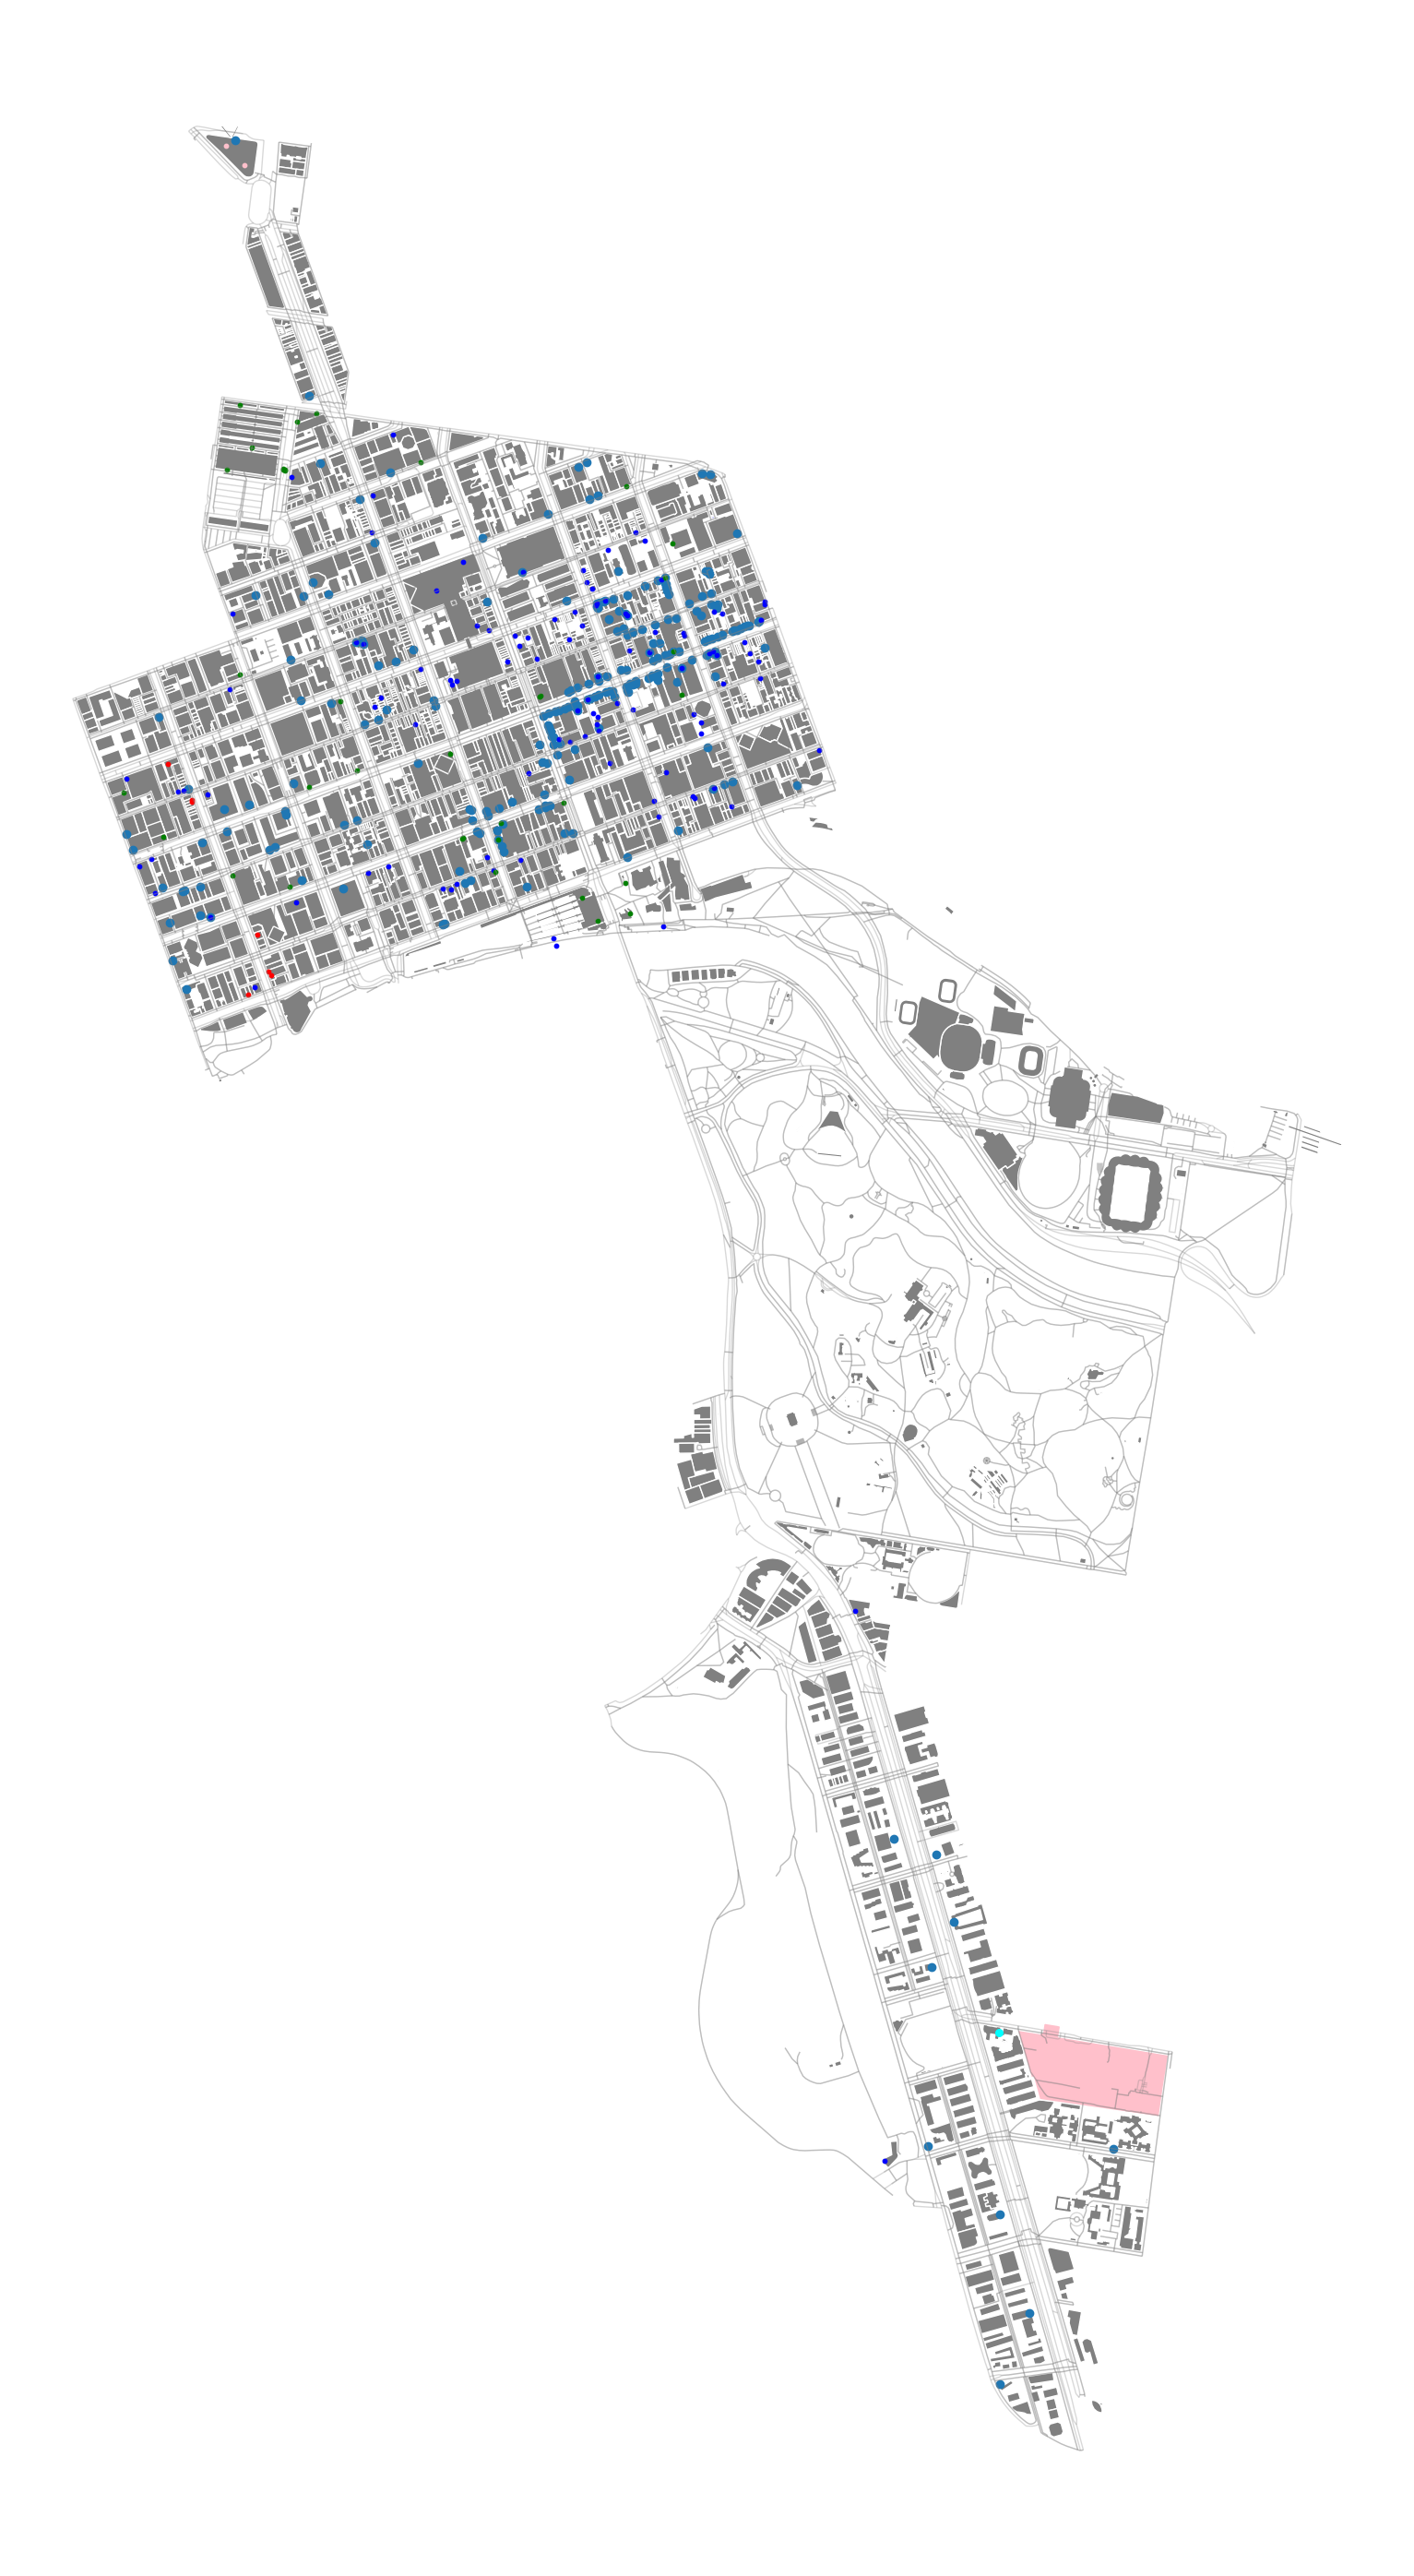

In [98]:
figure, ax = plt.subplots(figsize=(24,36))

# Plot the footprint
buildings.plot(ax=ax, facecolor="grey")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="grey", alpha=0.3)

# Plot restaurants
# am_df.plot(ax=ax, facecolor="pink", markersize=10)

for i in range(len(am_df)):
  amenity = am_df[i]
  amenity.plot(figsize=(10,6), ax=ax, color=col[i], markersize=10)

# Plot The Chevron
geom.plot(ax=ax, color="cyan", markersize=30)

plt.axis('off')
plt.show()

#### ㊙️ Geocoding: name to coordinates

In [99]:
our_place = "The Chevron"  # "The Chevron"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

geometry  \
0  POINT (144.97973 -37.84527)   

                                             address  
0  The Chevron, Commercial Road, Melbourne, City ...

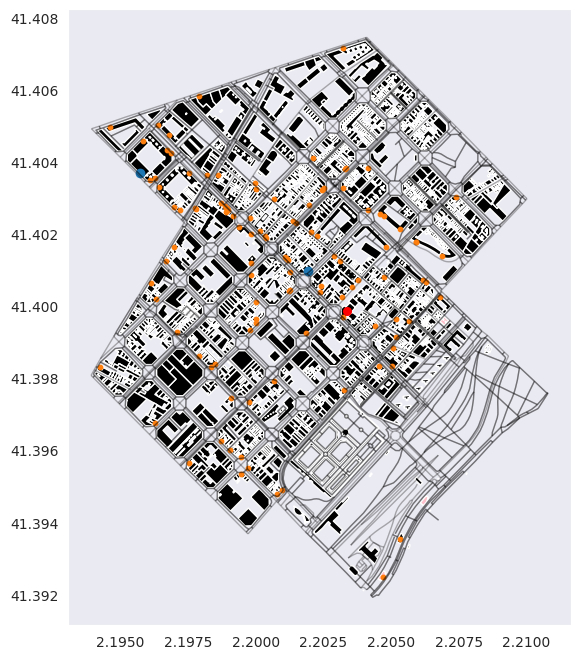

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [ ]:
rad = p.buffer(0.008 * 0.5)  # making offset of 1.5 km from our point of interest

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings.crs
)

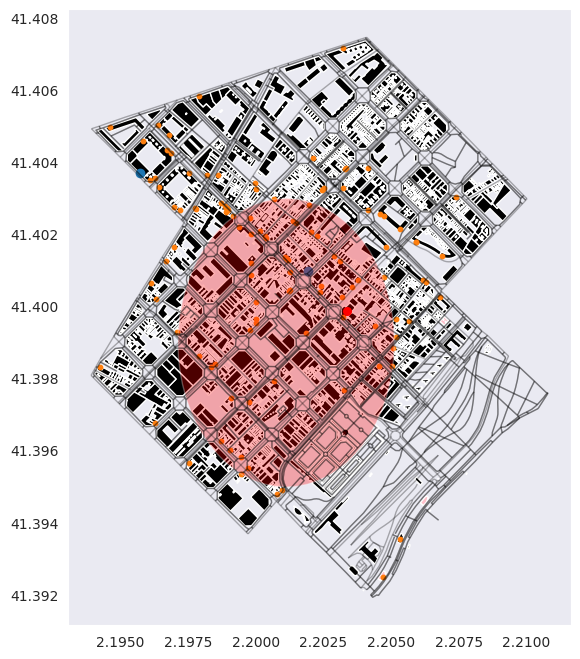

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

plt.show()

In [ ]:
accessible_restaurants = [r for r in restaurants["geometry"] if isinstance(r, Point) and r.within(rad["geometry"][0])]
accessible_restaurants = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_restaurants,
    },
    crs=buildings.crs
)

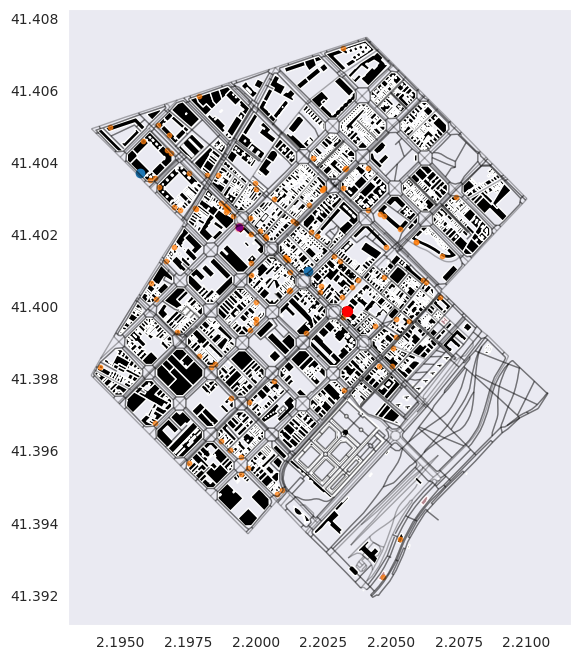

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10, alpha=0.7)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=50)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

accessible_restaurants.plot(ax=ax, facecolor="purple", markersize=20, alpha=1.0)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

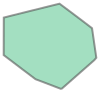

In [ ]:
zone = edges.unary_union.convex_hull
zone

In [ ]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

{'n': 1907,
 'm': 5413,
 'k_avg': 5.67697954902989,
 'edge_length_total': 160919.76599999916,
 'edge_length_avg': 29.728388324404058,
 'streets_per_node_avg': 3.40534871525957,
 'streets_per_node_counts': {0: 0, 1: 44, 2: 2, 3: 1009, 4: 841, 5: 11},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.023072889355007866,
  2: 0.001048767697954903,
  3: 0.5291033036182485,
  4: 0.4410068169900367,
  5: 0.0057682223387519665},
 'intersection_count': 1863,
 'street_length_total': 95690.108,
 'street_segment_count': 3176,
 'street_length_avg': 30.129127204030226,
 'circuity_avg': 1.030140938475798,
 'self_loop_proportion': 0.001889168765743073,
 'node_density_km': 10249958297341.55,
 'intersection_density_km': 10013462143653.543,
 'edge_density_km': 864929675258496.1,
 'street_density_km': 514325965636134.75}

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

Spearmint Rhino Gentlemen's Club   
             624940927   stripclub                 Centrefold Lounge   
             660027387   stripclub                  Showgirls Bar 20   
             660027388   stripclub                               NaN   
             6028978538  stripclub                     Sky Strippers   
             6887240029  stripclub                               NaN   
             9896495563  stripclub                   Top of the Town

In [104]:
origin = (
    osmnx.geocode_to_gdf("The Chevron")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Top of the Town")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

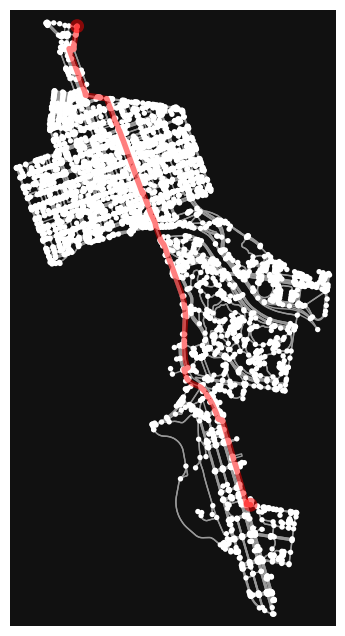

In [105]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [ ]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

/tmp/ipykernel_2205/3375068879.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  route_geom.length


0    0.01473
dtype: float64

### 🕸 Walkability analysis

How far can you reach from a place on foot?

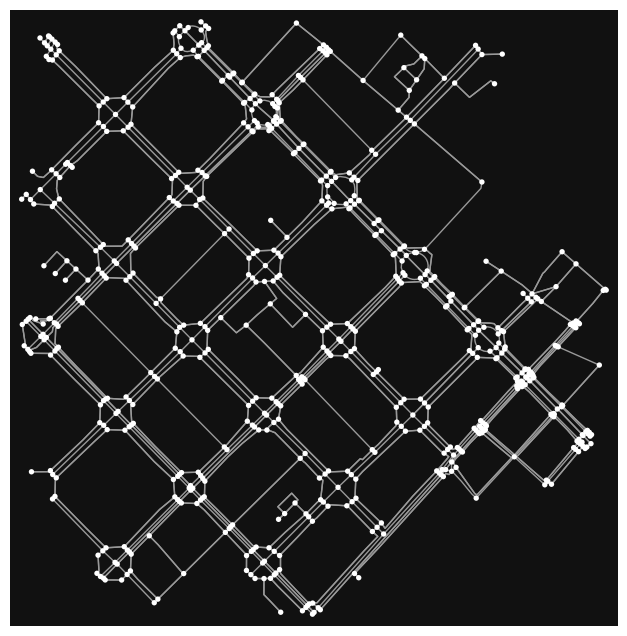

In [ ]:
# getting iaac node from the graph:
iaac_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only:
g = osmnx.truncate.truncate_graph_dist(graph, iaac_node, max_dist=500)
figure, ax = osmnx.plot_graph(g)


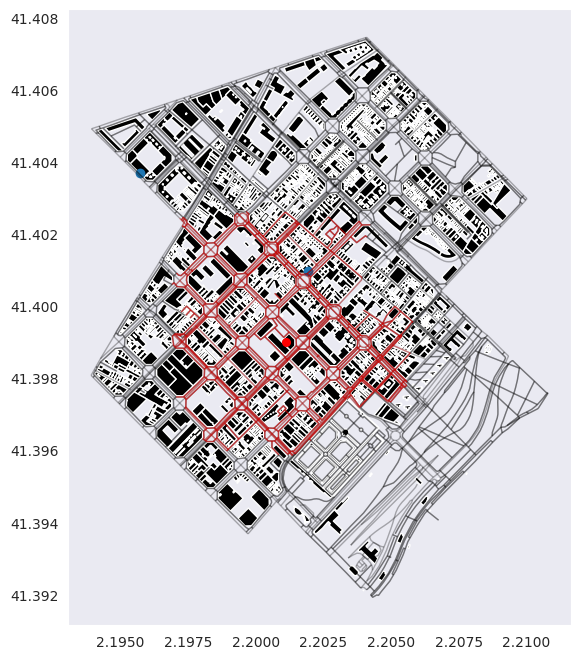

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

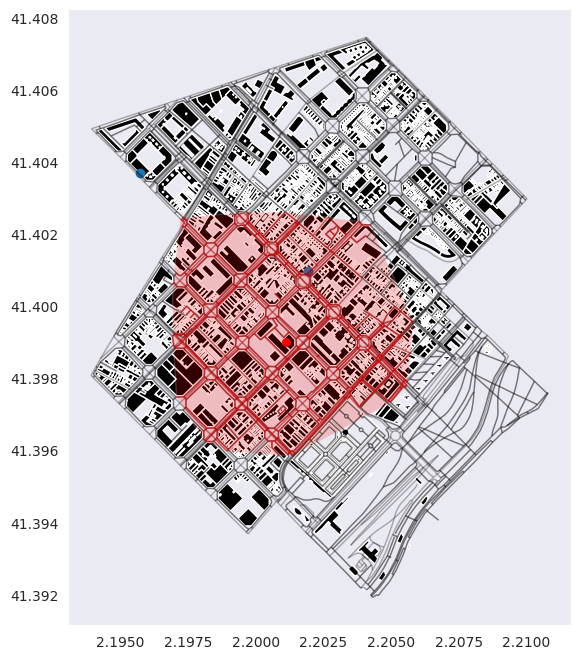

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.